# グラフの描画

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

In [0]:
from numpy.random import randint

2個のサイコロを100回振った結果を保存

In [3]:
dices = randint(1, 7, (100, 2)) 
dices[:5]

array([[3, 5],
       [3, 4],
       [6, 5],
       [1, 6],
       [5, 4]])

2個の目の合計を計算

In [4]:
total = np.sum(dices, axis=1)
total[:5]

array([ 8,  7, 11,  7,  9])

それぞれの目について、ゾロ目の回数を計算

In [5]:
doublets = [0, 0, 0, 0, 0, 0]
for (x, y) in dices:
    if x == y:
        doublets[x-1] += 1
doublets

[6, 5, 1, 2, 5, 2]

目の組み合わせごとの回数を計算

In [6]:
counts = np.zeros((6, 6))
for (x, y) in dices:
    counts[y-1, x-1] += 1
print (counts)

[[6. 1. 2. 7. 1. 1.]
 [1. 5. 4. 4. 2. 1.]
 [3. 0. 1. 3. 2. 3.]
 [1. 4. 2. 2. 3. 1.]
 [5. 3. 4. 0. 5. 6.]
 [4. 1. 5. 1. 4. 2.]]


計算結果をグラフに表示

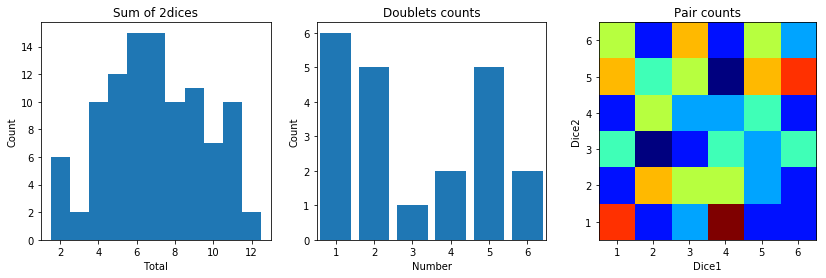

In [7]:
fig = plt.figure(figsize=(14, 4))
subplot = fig.add_subplot(1, 3, 1)
subplot.set_title('Sum of 2dices')
subplot.set_xlabel('Total')
subplot.set_ylabel('Count')
subplot.set_xlim(1, 13)
subplot.hist(total, bins=11, range=(1.5, 12.5), label='Sum')

subplot = fig.add_subplot(1, 3, 2)
subplot.set_title('Doublets counts')
subplot.set_xlabel('Number')
subplot.set_ylabel('Count')
subplot.set_xlim(0.5, 6.5)
subplot.bar(range(1, 7), doublets, align='center')

subplot = fig.add_subplot(1, 3, 3)
subplot.set_title('Pair counts')
subplot.set_xlabel('Dice1')
subplot.set_ylabel('Dice2')
subplot.imshow(counts,
    origin='lower', extent=(0.5, 6.5, 0.5, 6.5),
    cmap='jet', interpolation='nearest')

In [0]:
from numpy.random import normal

In [0]:
def generate_data01(n):
    data_x = []
    data_y = []
    for i in range(n):
        x = float(i) / float(n-1) # [0, 1]をn等分したi番目の値
        y = np.sin(2*np.pi*x) + normal(0, 0.3)
        data_x.append(x)
        data_y.append(y)
    return data_x, data_y

In [0]:
def generate_data02(n):
    data_x = np.linspace(0, 1, n)
    data_y = np.sin(2*np.pi*data_x) + normal(0, 0.3, n)
    return data_x, data_y

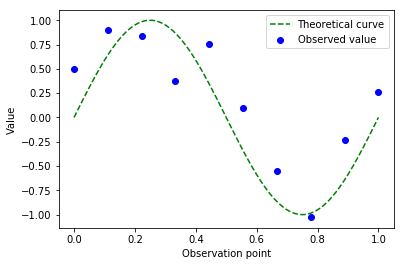

In [11]:
fig = plt.figure()

data_x, data_y = generate_data01(10)
#data_x, data_y = generate_data02(10)

subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlabel('Observation point')
subplot.set_ylabel('Value')
subplot.set_xlim(-0.05,1.05)

# 生成したデータを表示
subplot.scatter(data_x, data_y,
                marker='o', color='blue',
                label='Observed value')

# 三角関数の曲線を表示
linex = np.linspace(0, 1, 100)
liney = np.sin(2*np.pi*linex)
subplot.plot(linex, liney,
             linestyle='--', color='green', 
             label='Theoretical curve')

# 凡例を表示
subplot.legend(loc=1)

## 練習問題

(1) $-1\le x\le 1$ の範囲で、$\sin(2\pi x)$ と $\cos(2\pi x)$ のグラフを重ねて表示してください。軸ラベルや凡例などを好みで追加してください。 

(2) $-1\le x\le 1$ の範囲で、$\sin(2\pi x)$ と $\cos(2\pi x)$ のグラフを（上下2段に）別々に表示してください。軸ラベルや凡例などを好みで追加してください。 

(3) 次は、$-10\le x\le 10,\,-10\le y\le 10$（$x,\,y$ は整数）の範囲について、$x^2 + y^2$ の値を保存した10x10行列（array）を用意して、ヒートマップを描くコードです。

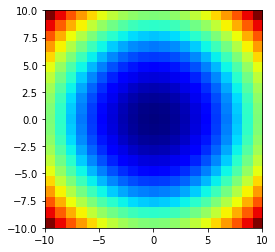

In [12]:
data = np.array([[x**2 + y**2
                  for x in range(-10, 11)] 
                 for y in range(-10, 11)])
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.imshow(data, origin='lower', extent=(-10, 10, -10, 10),
               cmap='jet', interpolation='nearest')

`imshow` メソッドのオプション `interpolation='nearest'` を `interpolation='bilinear'` に変えると、結果がどのように変わるか確認してください。さらに、オプション `cmap='jet'` を `cmap=plt.cm.gray_r` に変えた場合を確認してください。

(4) 次は、(3)と同じデータを $0\le x\le 10,\,0\le y\le 10$ の範囲に制限したものです。(3)と同様のコードでヒートマップを描いて、`origin` オプションの有無、もしくは、`extent` オプションに指定する値を変更した際に、グラフがどのように変化するか観察してください。

（ヒント：`extent` オプションは、グラフの目盛りに付ける数値を指定するもので、グラフに描くデータの範囲を指定するものではありません。）

In [0]:
data = np.array([[x**2 + y**2
                  for x in range(0, 11)]
                 for y in range(0, 11)])